In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
# import data
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) 
        label = tmp[0,0:].astype(np.str) 
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label 

ratings, rate_label = loadCSVfile('Synthetic_Movie_Lens/ratings.csv')
tags, tag_label = loadCSVfile('Synthetic_Movie_Lens/tags.csv')
links, link_label = loadCSVfile('Synthetic_Movie_Lens/links.csv')
movies, movie_label = loadCSVfile('Synthetic_Movie_Lens/movies.csv')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19172/4248012774.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19172/4248012774.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = tmp[1:,0:].astype(np.str)
C:\Users\LENOVO\AppData\Local\Temp/ipyker

In [25]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['' 'userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 5)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [31]:
df_ratings = pd.read_csv('Synthetic_Movie_Lens/ratings.csv')  
df_tags = pd.read_csv('Synthetic_Movie_Lens/tags.csv')  
df_links = pd.read_csv('Synthetic_Movie_Lens/links.csv')  
df_movies = pd.read_csv('Synthetic_Movie_Lens/movies.csv')  

## Quation 1:A

In [57]:
def construct_R(name):
    df = pd.read_csv(name)  
    print(df)
    a = df['userId'].unique()
    b = df['movieId'].unique()
    columns =  sorted(a)
    rows = sorted(b)
    R = pd.DataFrame(np.nan, index=rows, columns=columns)
    for index, row in df.iterrows():
        R[(int(row['userId']))][int(row['movieId'])] = row['rating']
    return R

In [58]:
R = construct_R('Synthetic_Movie_Lens/ratings.csv')

        Unnamed: 0  userId  movieId  rating   timestamp
0                0     496   112852     3.0  1415520462
1                1     391     1947     4.0  1030945141
2                2     387     1562     1.5  1095041022
3                3     474     2716     4.5  1053020930
4                4     483    88125     4.5  1311337237
...            ...     ...      ...     ...         ...
100831      100831     469     1219     4.0   965661925
100832      100832     599     3571     2.0  1498511343
100833      100833     414      276     3.0   961596299
100834      100834     395      168     3.0   841503984
100835      100835     288     2407     3.5  1054568795

[100836 rows x 5 columns]


In [59]:
sparsity = (len(R.columns) * len(R.index) - R.isna().sum().sum())/(len(R.columns) * len(R.index))
print("Sparsity: %0.7f " % (sparsity))

Sparsity: 0.0169997 


## Quation 1:B

In [29]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,3])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19172/2238068674.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rating_count = np.array([rating_span,rating_counter])


Counter({'3.0': 20046,
         '4.0': 26816,
         '1.5': 1791,
         '4.5': 8553,
         '2.5': 5551,
         '2.0': 7551,
         '1.0': 2811,
         '3.5': 13136,
         '5.0': 13211,
         '0.5': 1370})

Text(0.5, 1.0, 'Frequency of rating values')

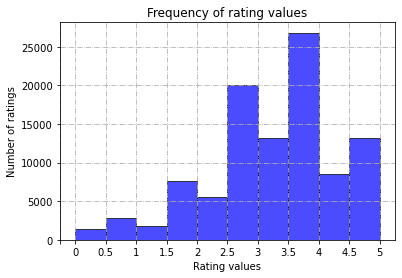

In [30]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

The shape is like a normal distribution around 3.5

## Question 1:C

Text(0.5, 1.0, 'Distribution of the number of ratings received among movies')

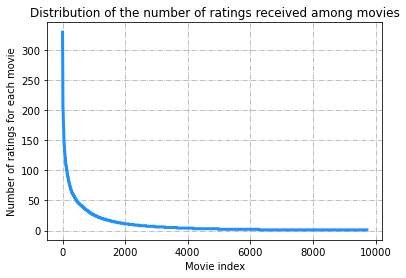

In [35]:
count = df_ratings['movieId'].value_counts()
plt.plot(count.values,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 1:D

Text(0.5, 1.0, 'Distribution of the number of ratings received among movies')

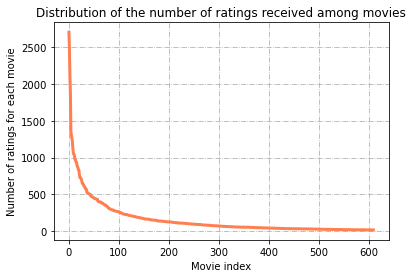

In [36]:
count = df_ratings['userId'].value_counts()
plt.plot(count.values,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Qustion 1:E

There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received.

## Qestion 1:F

Text(0.5, 1.0, 'Variance of the rating values rerceived by each movie')

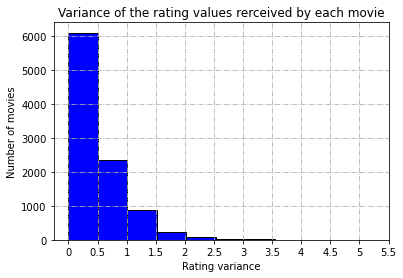

In [61]:
R.var(axis=1)
R_array = np.array(R)
R_var = np.nanvar(R_array, axis=1)
plt.hist(R_var, bins = 10,facecolor="blue", edgecolor="black") 
plt.xticks((0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5),(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

### Popular moving trimming

In [67]:
def PMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] > 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim
# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
PMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2)]

### Unpopular movie trimming

In [86]:
# define a function for Unpopular movie trimming
def UMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] <= 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test UMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
UMT(a)

[('2', '2', 2), ('2', '3', 5), ('6', '3', 5)]

### High variance movie trimming

In [88]:
# Define a function for high variance movie trimming method
def HVMT(testset):
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter1 = list(filter(lambda x:x[1] >= 5,counter))
    var_list = list(get_var(np.array(testset)[:,1:3]).items())
    count_filter2 = list(filter(lambda x:x[1] >= 2,var_list))
    count_filter = list(set([x[0] for x in count_filter1]).intersection(set([y[0] for y in count_filter2])))
    #count_filter = list([x[0] for x in count_filter1 if x[0] in [y[0] for y in count_filter2]])
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5),
    ('0','1',100),('0','1',20),('5','3',5),('6','3',5)]
HVMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2), ('0', '1', 100), ('0', '1', 20)]

## Question 10: Designing the MF Collaborative Filter

In [63]:
from surprise import KNNBasic
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader

In [65]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

## Question 10:A

In [66]:
mae = []
rmse = []

for k in range(2,52,2):
    svd = SVD(n_factors=k)
    result_dict = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8701  0.8668  0.8644  0.8668  0.8644  0.8558  0.8717  0.8739  0.8660  0.8690  0.8669  0.0047  
MAE (testset)     0.6680  0.6672  0.6645  0.6691  0.6652  0.6604  0.6697  0.6654  0.6649  0.6685  0.6663  0.0026  
Fit time          1.34    1.41    1.41    1.32    1.29    1.33    1.32    1.31    1.31    1.35    1.34    0.04    
Test time         0.17    0.06    0.05    0.05    0.06    0.06    0.06    0.05    0.06    0.06    0.07    0.03    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8700  0.8745  0.8631  0.8667  0.8702  0.8567  0.8663  0.8675  0.8621  0.8728  0.8670  0.0050  
MAE (testset)     0.6681  0.6687  0.6635  0.6656  0.6672  0.6578  0.6645  0.6715  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8789  0.8633  0.8642  0.8640  0.8662  0.8641  0.8612  0.8552  0.8693  0.8748  0.8661  0.0064  
MAE (testset)     0.6727  0.6599  0.6643  0.6650  0.6669  0.6647  0.6622  0.6572  0.6646  0.6700  0.6647  0.0043  
Fit time          2.34    2.45    2.44    2.31    2.26    2.29    2.25    2.27    2.24    2.26    2.31    0.07    
Test time         0.07    0.05    0.06    0.06    0.06    0.06    0.05    0.06    0.06    0.06    0.06    0.01    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8673  0.8797  0.8694  0.8709  0.8762  0.8482  0.8665  0.8509  0.8594  0.8717  0.8660  0.0097  
MAE (testset)     0.6655  0.6778  0.6657  0.6692  0.6754  0.6536  0.6653  0.6509  0.6

Text(0.5, 1.0, 'MAE against #k of latent factors (MF with bias)')

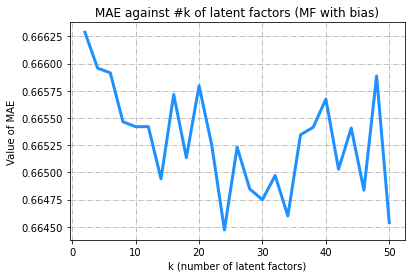

In [76]:
# MAE plot 
x = range(2,52,2)
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (MF with bias)')

Text(0.5, 1.0, 'RMSE against #k of latent factors (MF with bias)')

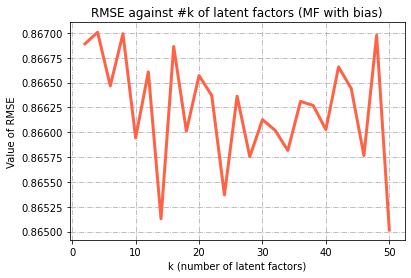

In [77]:
# RMSE Plot
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (MF with bias)')

## Question 10:B

In [81]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 50
The minimum average RMSE value is: 0.8650173536058647
The optimal k for MAE is: 24
The minimum average MAE value is: 0.66447078051676


## Question 10:C

In [ ]:
def cal_rmse(Test_subset,data):
    kf = KFold(n_splits=10)
    rmse = []
    for k in range(2,52,2):
        svd = SVD(n_factors=k)
        rmse_i = []
        for trainset, testset in kf.split(data):

            # train and test algorithm.
            svd.fit(trainset)
            if Test_subset == "PMT":
                testset_trim = PMT(testset)
                predictions = svd.test(testset_trim)
            elif Test_subset == "UMT":
                testset_trim = UMT(testset)
                predictions = svd.test(testset_trim)
            else: # HVMT
                testset_trim = HVMT(testset)
                predictions = svd.test(testset_trim)

            # Compute and print Root Mean Squared Error
            rmse_i.append(accuracy.rmse(predictions, verbose=True))
        rmse.append(np.mean(rmse_i))
    return rmse

In [ ]:
def plot_rmse(rmse,plot_title):
    x = range(2,52,2)
    plt.plot(x,rmse,color='dodgerblue',linewidth=3)
    plt.grid(True,linestyle='-.')
    plt.xlabel('k (number of latent factors)')
    plt.ylabel('Value of RMSE')
    plt.title('RMSE against k' + plot_title)
    print('The minimum average value of RMSE is:',min(rmse))

### Popular movie trimming dataset

In [83]:
# train the dataset using Popular movie trimming
from surprise.model_selection import KFold
from surprise import accuracy
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = PMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8573
RMSE: 0.8365
RMSE: 0.8361
RMSE: 0.8429
RMSE: 0.8421
RMSE: 0.8674
RMSE: 0.8618
RMSE: 0.8655
RMSE: 0.8537
RMSE: 0.8525
RMSE: 0.8662
RMSE: 0.8530
RMSE: 0.8444
RMSE: 0.8557
RMSE: 0.8463
RMSE: 0.8589
RMSE: 0.8390
RMSE: 0.8593
RMSE: 0.8431
RMSE: 0.8415
RMSE: 0.8476
RMSE: 0.8496
RMSE: 0.8411
RMSE: 0.8656
RMSE: 0.8414
RMSE: 0.8548
RMSE: 0.8574
RMSE: 0.8424
RMSE: 0.8489
RMSE: 0.8381
RMSE: 0.8399
RMSE: 0.8536
RMSE: 0.8611
RMSE: 0.8406
RMSE: 0.8357
RMSE: 0.8494
RMSE: 0.8524
RMSE: 0.8622
RMSE: 0.8548
RMSE: 0.8485
RMSE: 0.8486
RMSE: 0.8581
RMSE: 0.8416
RMSE: 0.8587
RMSE: 0.8467
RMSE: 0.8487
RMSE: 0.8317
RMSE: 0.8650
RMSE: 0.8591
RMSE: 0.8518
RMSE: 0.8452
RMSE: 0.8497
RMSE: 0.8438
RMSE: 0.8430
RMSE: 0.8525
RMSE: 0.8475
RMSE: 0.8514
RMSE: 0.8598
RMSE: 0.8630
RMSE: 0.8417
RMSE: 0.8509
RMSE: 0.8391
RMSE: 0.8514
RMSE: 0.8551
RMSE: 0.8445
RMSE: 0.8451
RMSE: 0.8505
RMSE: 0.8565
RMSE: 0.8562
RMSE: 0.8405
RMSE: 0.8704
RMSE: 0.8585
RMSE: 0.8381
RMSE: 0.8403
RMSE: 0.8520
RMSE: 0.8397
RMSE: 0.8481

The minimum average value of RMSE is: 0.8452337113423314


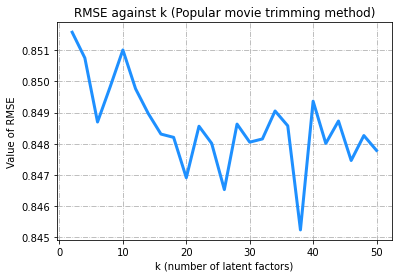

In [89]:
x = range(2,52,2)
plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming dataset)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming dataset

In [91]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = UMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.9149
RMSE: 0.9147
RMSE: 0.9042
RMSE: 0.8969
RMSE: 0.9088
RMSE: 0.8957
RMSE: 0.8954
RMSE: 0.8887
RMSE: 0.8742
RMSE: 0.8918
RMSE: 0.8745
RMSE: 0.9067
RMSE: 0.8815
RMSE: 0.9213
RMSE: 0.9270
RMSE: 0.9142
RMSE: 0.9089
RMSE: 0.9147
RMSE: 0.9052
RMSE: 0.8969
RMSE: 0.9218
RMSE: 0.9088
RMSE: 0.9243
RMSE: 0.8912
RMSE: 0.8956
RMSE: 0.9042
RMSE: 0.9059
RMSE: 0.9208
RMSE: 0.9053
RMSE: 0.8922
RMSE: 0.9136
RMSE: 0.8927
RMSE: 0.9078
RMSE: 0.8896
RMSE: 0.8951
RMSE: 0.9154
RMSE: 0.9010
RMSE: 0.9141
RMSE: 0.8906
RMSE: 0.8977
RMSE: 0.9006
RMSE: 0.9074
RMSE: 0.9096
RMSE: 0.8898
RMSE: 0.8797
RMSE: 0.9078
RMSE: 0.8876
RMSE: 0.9186
RMSE: 0.9012
RMSE: 0.9183
RMSE: 0.9111
RMSE: 0.9217
RMSE: 0.9027
RMSE: 0.8829
RMSE: 0.8919
RMSE: 0.8854
RMSE: 0.9007
RMSE: 0.8998
RMSE: 0.9198
RMSE: 0.9237
RMSE: 0.9082
RMSE: 0.8743
RMSE: 0.8938
RMSE: 0.8974
RMSE: 0.8891
RMSE: 0.9050
RMSE: 0.9060
RMSE: 0.9042
RMSE: 0.9210
RMSE: 0.9052
RMSE: 0.9007
RMSE: 0.9052
RMSE: 0.9279
RMSE: 0.8942
RMSE: 0.8810
RMSE: 0.8970
RMSE: 0.9289

The minimum average value of RMSE is: 0.8985198148644804


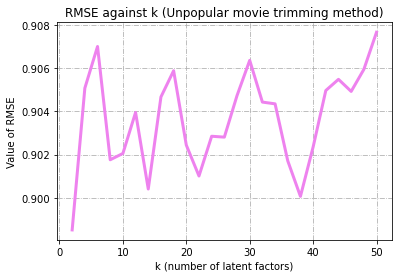

In [92]:
x = range(2,52,2)
plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming dataset

In [ ]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

In [ ]:
# show time (plot)
x = range(2,52,2)
plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

## Question 10: D

Plot the ROC curves for NMF-based collaborative filter

In [ ]:
# define plot drawing
from sklearn import metrics
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=3,color='deepskyblue',label= 'area under curve = %0.4f' % roc_auc)
    #color='coral'
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)   

In [ ]:
# Define a func to get ground_truth
def get_labels(predictions,threshold):
    #y_pred = list(map(lambda x:0 if x[3] < threshold else 1, predictions))
    #y_true = list(map(lambda x:0 if x[2] < threshold else 1, predictions))
    y_true, y_pred = [], []
    for u, i, r_real, r_pred, misc in predictions:
        y_true.append(threshold <= r_real)
        y_pred.append(r_pred)
    return y_pred, y_true

In [ ]:
threshold = [2.5,3,3.5,4]
nmf = NMF(n_factors=20)
trainset, testset = train_test_split(data, test_size=.1)
predictions = nmf.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

## Question 11: Designing a Naive Collaborative Filter

In [ ]:
from surprise import AlgoBase

class NaiveFilter(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, u, i):
        return np.mean([rating for (_, rating) in self.trainset.ur[u]])

In [ ]:
naiveCF = NaiveFilter()
output = cross_validate(naiveCF, data, measures=['RMSE'], cv=10)
    
avg_rmse = np.mean(output['test_rmse'])
    
print("Avg RMSE: ", avg_rmse)